NAMA : IBNU AMUNA MALIK
EMAIL : amunamalik12@gmail.com / ibnu17002@mail.unpad.ac.id

dataset yang dipakai merupakan dataset yang berisi kumpulan kalimat kalimat dengan penanda emosi yang disampaikan, 
contoh :  feel like I am still looking at a blank canvas blank pieces of paper;sadness

Program ini dilatih untuk menentukan emosi yang dipancarkan sebuah kalimat. 

In [ ]:
import pandas as pd
df_train = pd.read_csv('train.txt', names=['sentence', 'Emotion'], delimiter=';', sep='\t') # membaca data train dan test pada file direktori sample data
df_test = pd.read_csv('test.txt', names=['sentence', 'Emotion'], delimiter=';', sep='\t')

In [ ]:
df_train #melihat bentuk dataframe 

,sentence,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


bentuk dataframe masih berupa kategorikal, maka kita akan menggunakan one hot encoding untung memisahkan setiap kategori menjadi kolom yang berbeda 

In [ ]:
category = pd.get_dummies(df_train.Emotion)
df_train_baru = pd.concat([df_train, category], axis=1)
df_train_baru = df_train_baru.drop(columns='Emotion')
df_train_baru

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
category = pd.get_dummies(df_test.Emotion)
df_test_baru = pd.concat([df_test, category], axis=1)
df_test_baru = df_test_baru.drop(columns='Emotion')
df_test_baru #mengaplikasikan one hot encoding pada dataframe test

,sentence,anger,fear,joy,love,sadness,surprise
0,im feeling rather rotten so im not very ambiti...,0,0,0,0,1,0
1,im updating my blog because i feel shitty,0,0,0,0,1,0
2,i never make her separate from me because i do...,0,0,0,0,1,0
3,i left with my bouquet of red and yellow tulip...,0,0,1,0,0,0
4,i was feeling a little vain when i did this one,0,0,0,0,1,0
...,...,...,...,...,...,...,...
3995,im having ssa examination tomorrow in the morn...,0,0,0,0,1,0
3996,i constantly worry about their fight against n...,0,0,1,0,0,0
3997,i feel its important to share this info for th...,0,0,1,0,0,0
3998,i truly feel that if you are passionate enough...,0,0,1,0,0,0


Pada ML ini, terdapat dua dataset yaitu dataset train dan test, dimana total dari seluruh dataset terdapat 20000 row ( 16000(train) + 4000(test)). Dimana dataset untuk test sebesar 4000 dari 20000 total maka test size 20% dari total dataset sudah terpenuhi

In [ ]:
kalimat_train = df_train_baru['sentence'].values
emosi_train = df_train_baru[['anger', 'fear', 'joy', 'love', 'sadness','surprise']].values #mengubah df train dan set menjadi value array 

kalimat_test = df_test_baru['sentence'].values
emosi_test = df_test_baru[['anger', 'fear', 'joy', 'love', 'sadness','surprise']].values


In [ ]:
kalimat_train # mengecek apakah data sudah menjadi array

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype=object)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # proses tokenisasi pada array yang telah dibentuk 
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_train) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_train)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16), #pengaplikasian Embedding pada ML 
    tf.keras.layers.LSTM(64), # pengaplikasian LSTM pada ML 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax') # penggunaan softmax untuk kategorikal 
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, emosi_train, epochs=num_epochs, 
                    validation_data=(padded_test, emosi_test), verbose=2) # pelatihan model 

Epoch 1/30
500/500 - 5s - loss: 1.3609 - accuracy: 0.4109 - val_loss: 0.8893 - val_accuracy: 0.6593
Epoch 2/30
500/500 - 3s - loss: 0.6448 - accuracy: 0.7378 - val_loss: 0.5598 - val_accuracy: 0.7738
Epoch 3/30
500/500 - 3s - loss: 0.4020 - accuracy: 0.8530 - val_loss: 0.4224 - val_accuracy: 0.8520
Epoch 4/30
500/500 - 3s - loss: 0.2558 - accuracy: 0.9074 - val_loss: 0.3729 - val_accuracy: 0.8690
Epoch 5/30
500/500 - 3s - loss: 0.1872 - accuracy: 0.9319 - val_loss: 0.3489 - val_accuracy: 0.8917
Epoch 6/30
500/500 - 3s - loss: 0.1376 - accuracy: 0.9517 - val_loss: 0.3206 - val_accuracy: 0.9025
Epoch 7/30
500/500 - 3s - loss: 0.1122 - accuracy: 0.9609 - val_loss: 0.3352 - val_accuracy: 0.9045
Epoch 8/30
500/500 - 3s - loss: 0.0829 - accuracy: 0.9717 - val_loss: 0.3925 - val_accuracy: 0.9018
Epoch 9/30
500/500 - 3s - loss: 0.0656 - accuracy: 0.9768 - val_loss: 0.3364 - val_accuracy: 0.9082
Epoch 10/30
500/500 - 3s - loss: 0.0581 - accuracy: 0.9785 - val_loss: 0.3724 - val_accuracy: 0.9020

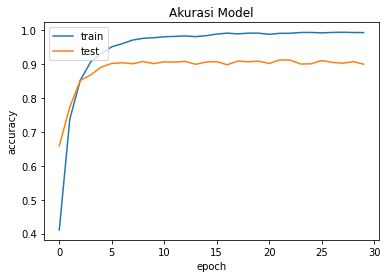

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() #melihat akurasi dari model untuk train dan test yang telah di execute

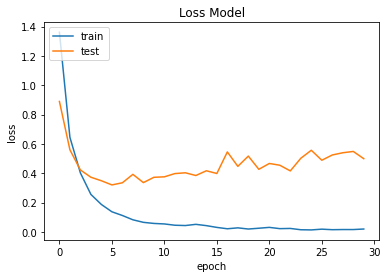

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() # melihat model loss untuk ML yang telah di execute 